# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.059895e+01     6.369250e+00
 * time: 0.004715919494628906
     1     2.684501e+01     6.966273e+00
 * time: 0.022602081298828125
     2     2.572043e+01     8.097569e+00
 * time: 0.10305500030517578
     3     1.919090e+01     6.520703e+00
 * time: 0.12314796447753906
     4     1.359527e+01     1.435675e+00
 * time: 0.14844298362731934
     5     1.283536e+01     2.459582e+00
 * time: 0.16509795188903809
     6     1.199500e+01     1.533053e+00
 * time: 0.18127703666687012
     7     1.107906e+01     1.641398e+00
 * time: 0.1974649429321289
     8     1.055931e+01     1.416190e+00
 * time: 0.21365094184875488
     9     1.014998e+01     8.702274e-01
 * time: 0.22965502738952637
    10     9.843952e+00     9.058887e-01
 * time: 0.24577689170837402
    11     9.651380e+00     7.653310e-01
 * time: 0.2613539695739746
    12     9.560921e+00     4.656557e-01
 * time: 0.27715396881103516
    13     9.517972e+00     5.791829e-01
 * time:

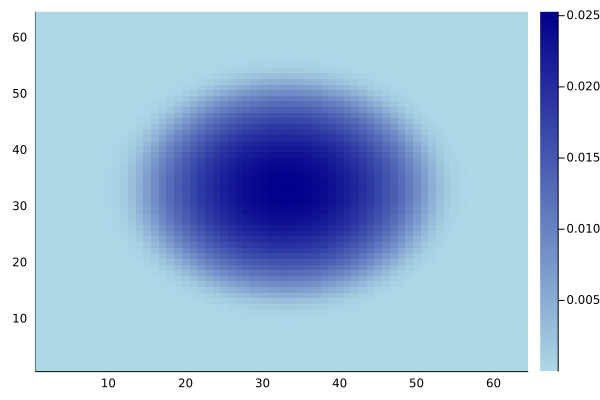

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)